In [14]:
import matplotlib
matplotlib.rcParams['figure.dpi'] = 150
import numpy as np
import matplotlib.pyplot as plt

## Custom CNN Models

170498071/170498071 [==============================] - 6s 0us/step
Epoch 1/20
313/313 [==============================] - 10s 8ms/step - loss: 1.6843 - accuracy: 0.3825 - val_loss: 1.4308 - val_accuracy: 0.4811
Epoch 2/20
313/313 [==============================] - 2s 6ms/step - loss: 1.3380 - accuracy: 0.5161 - val_loss: 1.2757 - val_accuracy: 0.5362
Epoch 3/20
313/313 [==============================] - 2s 6ms/step - loss: 1.1765 - accuracy: 0.5796 - val_loss: 1.1445 - val_accuracy: 0.5910
Epoch 4/20
313/313 [==============================] - 2s 7ms/step - loss: 1.0684 - accuracy: 0.6217 - val_loss: 1.0682 - val_accuracy: 0.6286
Epoch 5/20
313/313 [==============================] - 2s 6ms/step - loss: 0.9820 - accuracy: 0.6530 - val_loss: 0.9845 - val_accuracy: 0.6587
Epoch 6/20
313/313 [==============================] - 2s 7ms/step - loss: 0.9122 - accuracy: 0.6795 - val_loss: 0.9727 - val_accuracy: 0.6634
Epoch 7/20
313/313 [==============================] - 2s 6ms/step - loss: 0.8463

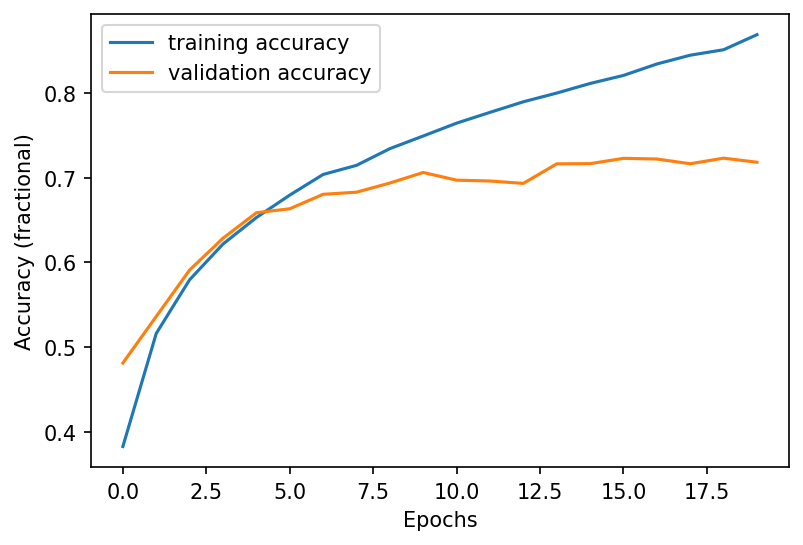

In [ ]:
#implementing in Keras
import tensorflow as tf

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D


#loading dataset
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()


#2. Convert xtest and xtrain to float32 and normalize data to range 0.0 - 1.0
X_train = np.float32(X_train/255.0)
X_test = np.float32(X_test/255.0)
#print(X_train_norm)
#print(X_test_norm)


#create ANN model
#model constants

#define network
model = Sequential()
model.add(Conv2D(32, kernel_size=3, activation='relu', input_shape = (32, 32, 3)))
model.add(MaxPooling2D(pool_size= (2,2), strides=2))
model.add(Conv2D(64, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2), strides= 2))
model.add(Conv2D(64, kernel_size= 3, activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2), strides= 2))
model.add(Flatten())
model.add(Dense(512, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

#Compile Network
model.compile(optimizer='adam', loss ='sparse_categorical_crossentropy',
              metrics = ['accuracy'])

#train the network with 20% validation
history = model.fit(X_train, y_train, batch_size = 128, epochs=20, validation_split=0.2) #spits out the training accuracy

#test accuracy and loss
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)

predictions = model.predict(X_test)

predictions[0]

np.argmax(predictions[0])

print(history.history.keys())
print(model.summary())
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy (fractional)')
plt.legend(['training accuracy', 'validation accuracy'], loc='best')

Epoch 1/20
313/313 [==============================] - 5s 12ms/step - loss: 1.6131 - accuracy: 0.4051 - val_loss: 1.3868 - val_accuracy: 0.5033
Epoch 2/20
313/313 [==============================] - 3s 11ms/step - loss: 1.2324 - accuracy: 0.5587 - val_loss: 1.1917 - val_accuracy: 0.5820
Epoch 3/20
313/313 [==============================] - 3s 11ms/step - loss: 1.0366 - accuracy: 0.6340 - val_loss: 1.0175 - val_accuracy: 0.6439
Epoch 4/20
313/313 [==============================] - 3s 11ms/step - loss: 0.9150 - accuracy: 0.6786 - val_loss: 0.9706 - val_accuracy: 0.6603
Epoch 5/20
313/313 [==============================] - 3s 10ms/step - loss: 0.8010 - accuracy: 0.7190 - val_loss: 0.8829 - val_accuracy: 0.7004
Epoch 6/20
313/313 [==============================] - 3s 10ms/step - loss: 0.7111 - accuracy: 0.7520 - val_loss: 0.8989 - val_accuracy: 0.6952
Epoch 7/20
313/313 [==============================] - 3s 11ms/step - loss: 0.6286 - accuracy: 0.7794 - val_loss: 0.9038 - val_accuracy: 0.6952

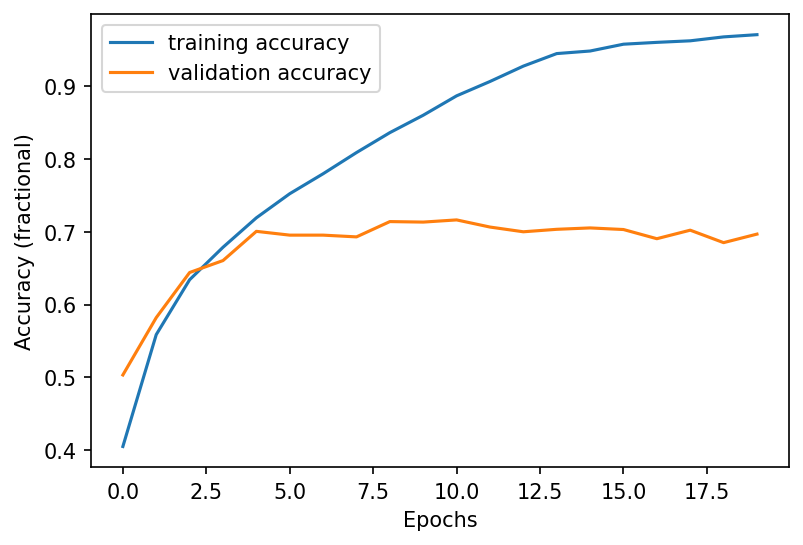

In [ ]:
#implementing in Keras
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D


#loading dataset
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()


#2. Convert xtest and xtrain to float32 and normalize data to range 0.0 - 1.0
X_train = np.float32(X_train/255.0)
X_test = np.float32(X_test/255.0)
#print(X_train_norm)
#print(X_test_norm)


#create ANN model
#model constants

#define network
model = Sequential()
model.add(Conv2D(32, kernel_size=5, activation='relu', input_shape = (32, 32, 3)))
model.add(Conv2D(64, kernel_size=5, activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2), strides= 2))
model.add(Conv2D(64, kernel_size=5, activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2), strides= 2))
model.add(Flatten())
model.add(Dense(512, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

#Compile Network
model.compile(optimizer='adam', loss ='sparse_categorical_crossentropy',
              metrics = ['accuracy'])

#train the network with 20% validation
history = model.fit(X_train, y_train, batch_size = 128, epochs=20, validation_split=0.2) #spits out the training accuracy

#test accuracy and loss
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)

predictions = model.predict(X_test)

predictions[0]

np.argmax(predictions[0])

print(history.history.keys())
print(model.summary())
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy (fractional)')
plt.legend(['training accuracy', 'validation accuracy'], loc='best')

Epoch 1/80
313/313 [==============================] - 9s 25ms/step - loss: 2.1469 - accuracy: 0.2068 - val_loss: 1.8243 - val_accuracy: 0.3368
Epoch 2/80
313/313 [==============================] - 7s 24ms/step - loss: 1.7650 - accuracy: 0.3562 - val_loss: 1.5774 - val_accuracy: 0.4226
Epoch 3/80
313/313 [==============================] - 7s 24ms/step - loss: 1.6001 - accuracy: 0.4304 - val_loss: 1.5148 - val_accuracy: 0.4690
Epoch 4/80
313/313 [==============================] - 8s 24ms/step - loss: 1.4954 - accuracy: 0.4756 - val_loss: 1.3628 - val_accuracy: 0.5246
Epoch 5/80
313/313 [==============================] - 8s 24ms/step - loss: 1.4245 - accuracy: 0.5087 - val_loss: 1.3264 - val_accuracy: 0.5504
Epoch 6/80
313/313 [==============================] - 7s 24ms/step - loss: 1.3686 - accuracy: 0.5362 - val_loss: 1.2150 - val_accuracy: 0.5876
Epoch 7/80
313/313 [==============================] - 7s 24ms/step - loss: 1.3192 - accuracy: 0.5539 - val_loss: 1.1834 - val_accuracy: 0.6110

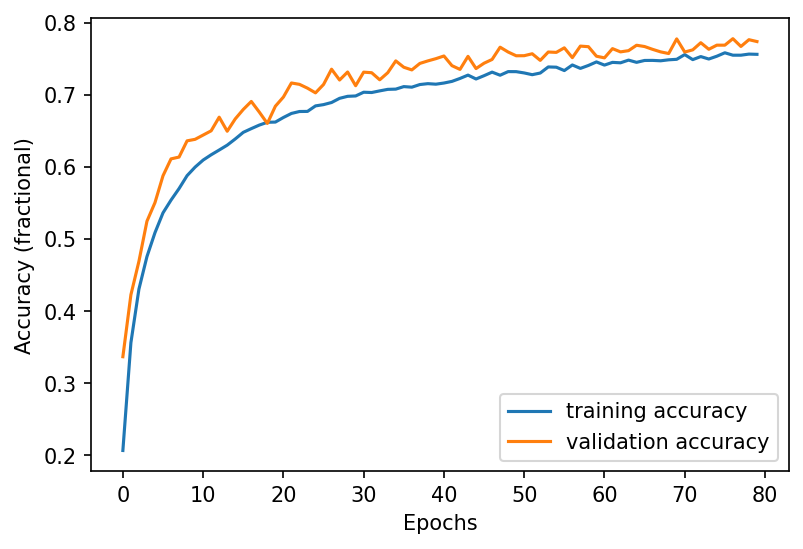

In [ ]:
#implementing in Keras
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout, Conv3D
from keras import regularizers

#loading dataset
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()


#2. Convert xtest and xtrain to float32 and normalize data to range 0.0 - 1.0
X_train = np.float32(X_train/255.0)
X_test = np.float32(X_test/255.0)
#print(X_train_norm)
#print(X_test_norm)


#create ANN model
#model constants
l2_alpha = 0.0005 #L2 regularization hyperparameter


#define network
model = Sequential()
model.add(Conv2D(96, kernel_size=3, activation='relu', input_shape = (32, 32, 3)))
model.add(Conv2D(96, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size= (2,2), strides=2))
model.add(Dropout(0.5, noise_shape=None, seed=None))
model.add(Conv2D(128, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2), strides= 2))
model.add(Dropout(0.5, noise_shape=None, seed=None))
model.add(Conv2D(128, kernel_size=2, activation='relu'))
model.add(Conv2D(128, kernel_size=2, activation='relu'))
model.add(Conv2D(128, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2), strides= 2))
model.add(Dropout(0.5, noise_shape=None, seed=None))
model.add(Flatten())
model.add(Dense(1024, activation = 'relu', kernel_regularizer= regularizers.l2(l2_alpha)))
model.add(Dropout(0.5, noise_shape=None, seed=None))
model.add(Dense(512, activation = 'relu', kernel_regularizer= regularizers.l2(l2_alpha)))
model.add(Dropout(0.5, noise_shape=None, seed=None))
model.add(Dense(10, activation = 'softmax'))

#adding model checkpoint
checkpoint = ModelCheckpoint(filepath='D:\\PhD Courses\\Machine Learning\\Project\\cp-{epoch:05d}-{val_accuracy:.2f}.hdf5',
                             monitor='val_accuracy',
                             mode='min',
                             period=5,
                             save_best_only=True)

#Compile Network
model.compile(optimizer='adam', loss ='sparse_categorical_crossentropy',
              metrics = ['accuracy'])

#train the network with 20% validation
history = model.fit(X_train, y_train,
                    batch_size = 128, epochs=80,
                    validation_split=0.2, callbacks=checkpoint)

#test accuracy and loss
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)

predictions = model.predict(X_test)

predictions[0]

np.argmax(predictions[0])

print(history.history.keys())
print(model.summary())
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy (fractional)')
plt.legend(['training accuracy', 'validation accuracy'], loc='best')

## VGG16 Model

Epoch 1/40
313/313 [==============================] - 19s 27ms/step - loss: 4.6462 - accuracy: 0.3572 - val_loss: 1.5072 - val_accuracy: 0.5001
Epoch 2/40
313/313 [==============================] - 8s 24ms/step - loss: 1.6400 - accuracy: 0.4525 - val_loss: 1.3482 - val_accuracy: 0.5434
Epoch 3/40
313/313 [==============================] - 8s 25ms/step - loss: 1.4587 - accuracy: 0.5000 - val_loss: 1.2914 - val_accuracy: 0.5582
Epoch 4/40
313/313 [==============================] - 8s 25ms/step - loss: 1.3568 - accuracy: 0.5291 - val_loss: 1.2541 - val_accuracy: 0.5696
Epoch 5/40
313/313 [==============================] - 8s 25ms/step - loss: 1.2990 - accuracy: 0.5468 - val_loss: 1.2307 - val_accuracy: 0.5811
Epoch 6/40
313/313 [==============================] - 8s 25ms/step - loss: 1.2435 - accuracy: 0.5648 - val_loss: 1.2061 - val_accuracy: 0.5915
Epoch 7/40
313/313 [==============================] - 9s 29ms/step - loss: 1.2225 - accuracy: 0.5752 - val_loss: 1.2072 - val_accuracy: 0.587

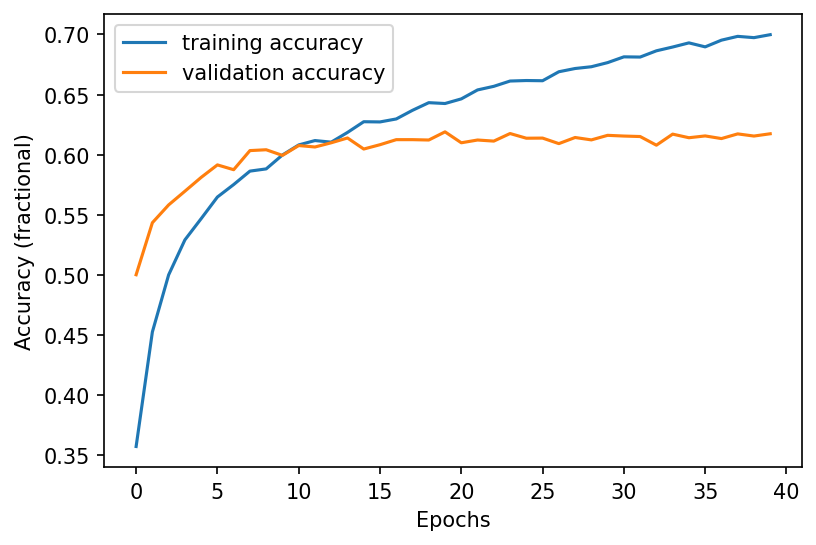

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras import layers
#implementing in Keras
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout, Conv3D
from keras import regularizers

base_model = VGG16(input_shape = (32, 32, 3), # Shape of our images
                   include_top = False, # Leave out the last fully connected layer
                   weights = 'imagenet')

for layer in base_model.layers:
    layer.trainable = False

# Flatten the output layer to 1 dimension
x = layers.Flatten()(base_model.output)

# Add a fully connected layer with 512 hidden units and ReLU activation
x = layers.Dense(512, activation='relu')(x)

# Add a dropout rate of 0.5
x = layers.Dropout(0.6)(x)

# Add a final sigmoid layer with 1 node for classification output
x = layers.Dense(10, activation='sigmoid')(x)

vgg_model = tf.keras.models.Model(base_model.input, x)

#Compile Network
vgg_model.compile(optimizer='adam', loss ='sparse_categorical_crossentropy',
              metrics = ['accuracy'])
#train the network with 20% validation
vgg_history = vgg_model.fit(X_train, y_train,
                    batch_size = 128, epochs=40,
                    validation_split=0.2)
#test accuracy and loss
test_loss, test_acc = vgg_model.evaluate(X_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)

predictions = vgg_model.predict(X_test)


print(vgg_history.history.keys())
print(vgg_model.summary())
plt.plot(vgg_history.history['accuracy'])
plt.plot(vgg_history.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy (fractional)')
plt.legend(['training accuracy', 'validation accuracy'], loc='best')

## InceptionV3 Model

Epoch 1/20
313/313 [==============================] - 190s 578ms/step - loss: 0.5416 - accuracy: 0.8180 - val_loss: 0.4545 - val_accuracy: 0.8480
Epoch 2/20
313/313 [==============================] - 174s 556ms/step - loss: 0.4029 - accuracy: 0.8615 - val_loss: 0.4143 - val_accuracy: 0.8592
Epoch 3/20
313/313 [==============================] - 174s 556ms/step - loss: 0.3585 - accuracy: 0.8763 - val_loss: 0.3930 - val_accuracy: 0.8610
Epoch 4/20
313/313 [==============================] - 174s 557ms/step - loss: 0.3332 - accuracy: 0.8847 - val_loss: 0.3605 - val_accuracy: 0.8777
Epoch 5/20
313/313 [==============================] - 174s 556ms/step - loss: 0.3173 - accuracy: 0.8905 - val_loss: 0.3564 - val_accuracy: 0.8799
Epoch 6/20
313/313 [==============================] - 180s 576ms/step - loss: 0.2919 - accuracy: 0.8971 - val_loss: 0.3639 - val_accuracy: 0.8755
Epoch 7/20
313/313 [==============================] - 181s 578ms/step - loss: 0.2771 - accuracy: 0.9032 - val_loss: 0.3498 -

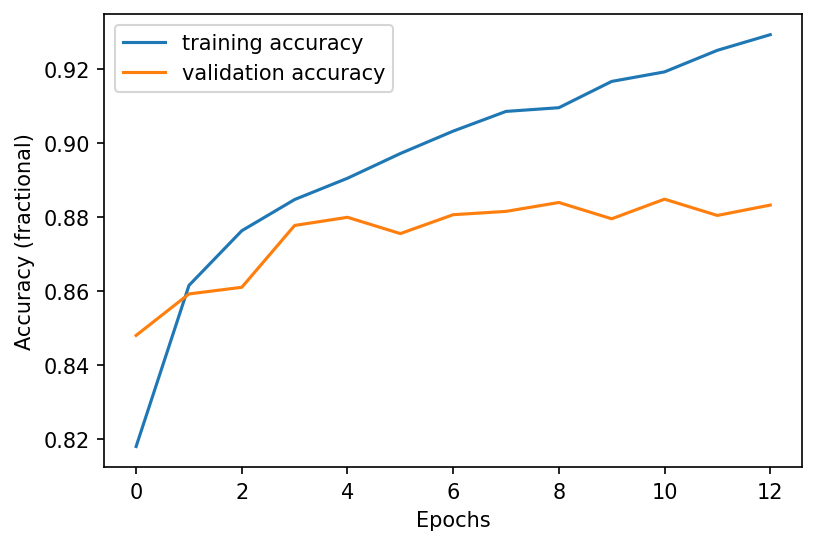

In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input
from tensorflow.keras.layers import Input, Lambda, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import smart_resize
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout, Conv3D

#loading dataset
from keras.datasets import cifar10
def preprocess_data(X, Y):
    """
    Method:
        pre-processes the data for your model.
    """
    X_p = preprocess_input(X)
    Y_p = to_categorical(Y, 10)

    return X_p, Y_p

(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train_p, y_train_p = preprocess_data(X_train, y_train)
X_test_p, y_test_p = preprocess_data(X_test, y_test)

base_inception = InceptionV3(include_top=False,
                             input_shape=(299, 299, 3))

input_layer = Input(shape=(32, 32, 3))

resizing_layer = Lambda(lambda image:                     \
                smart_resize(image, \
                (299, 299)))(input_layer)

x = base_inception(resizing_layer, training=False)

x = GlobalAveragePooling2D()(x)
x = Dense(500, activation='relu')(x)
x = Dropout(0.3)(x)
x =  Dense(10, activation='softmax')(x)

inception_model = Model(inputs=input_layer, outputs=x)

# Freeze the base network
base_inception.trainable = False

# early stopping
of_checkpoint = EarlyStopping(monitor='val_accuracy',
                              patience=2,
                              mode='max',
                              restore_best_weights=True)

# Compile Network
inception_model.compile(optimizer='adam', loss ='categorical_crossentropy',
              metrics = ['accuracy'])
#train the network with 20% validation
inception_history = inception_model.fit(X_train_p, y_train_p,
                    batch_size = 128, epochs=20,
                    validation_split=0.2, callbacks=of_checkpoint)
#test accuracy and loss
test_loss, test_acc = inception_model.evaluate(X_test_p, y_test_p, verbose=2)
print('\nTest accuracy:', test_acc)

predictions = inception_model.predict(X_test_p)


print(inception_history.history.keys())
print(inception_model.summary())
plt.plot(inception_history.history['accuracy'])
plt.plot(inception_history.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy (fractional)')
plt.legend(['training accuracy', 'validation accuracy'], loc='best')

## ResNet50 Model

In [ ]:
bimport tensorflow as tf
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.layers import Input, Lambda, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import smart_resize
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical

#loading dataset
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

def preprocess_data(X):
    """
    Method:
        pre-processes the data for your model.
    """
    X_p = preprocess_input(X)
    # Y_p = to_categorical(Y, 10)

    return X_p#, Y_p

X_train_p = preprocess_data(X_train)
X_test_p = preprocess_data(X_test)



base_resnet = tf.keras.applications.resnet.ResNet50(input_shape=(224, 224, 3),
                                                    include_top=False)

input_layer = Input(shape=(32, 32, 3))
resizing_layer = tf.keras.layers.UpSampling2D(size=(7,7))(input_layer)

x = base_resnet(resizing_layer, training=False)
x = GlobalAveragePooling2D()(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(1024, activation="relu")(x)
x = tf.keras.layers.Dense(512, activation="relu")(x)
x = tf.keras.layers.Dense(10, activation="softmax", name="classification")(x)

resnet_model = Model(inputs=input_layer, outputs=x)

# Compile Network
resnet_model.compile(optimizer='SGD', loss ='sparse_categorical_crossentropy',
              metrics = ['accuracy'])

# Freeze the base network
base_resnet.trainable = False

# early stopping
of_checkpoint = EarlyStopping(monitor='val_accuracy',
                              patience=2,
                              mode='max',
                              restore_best_weights=True)

#train the network with 20% validation
resnet_history = resnet_model.fit(X_train_p, y_train,
                    batch_size = 128, epochs=20,
                    validation_split=0.2, callbacks=of_checkpoint)
#test accuracy and loss
test_loss, test_acc = resnet_model.evaluate(X_test_p, y_test, verbose=2)
print('\nTest accuracy:', test_acc)

predictions = resnet_model.predict(X_test_p)

Epoch 1/20
313/313 [==============================] - 431s 1s/step - loss: 0.6822 - accuracy: 0.7736 - val_loss: 0.2734 - val_accuracy: 0.9074
Epoch 2/20
313/313 [==============================] - 429s 1s/step - loss: 0.1751 - accuracy: 0.9403 - val_loss: 0.3760 - val_accuracy: 0.8838
Epoch 3/20
313/313 [==============================] - 429s 1s/step - loss: 0.1011 - accuracy: 0.9658 - val_loss: 0.1993 - val_accuracy: 0.9358
Epoch 4/20
313/313 [==============================] - 428s 1s/step - loss: 0.0535 - accuracy: 0.9822 - val_loss: 0.1647 - val_accuracy: 0.9489
Epoch 5/20
313/313 [==============================] - 428s 1s/step - loss: 0.0375 - accuracy: 0.9896 - val_loss: 0.1601 - val_accuracy: 0.9561
Epoch 6/20
313/313 [==============================] - 429s 1s/step - loss: 0.0133 - accuracy: 0.9964 - val_loss: 0.1649 - val_accuracy: 0.9579
Epoch 7/20
313/313 [==============================] - 429s 1s/step - loss: 0.0022 - accuracy: 0.9998 - val_loss: 0.1810 - val_accuracy: 0.9601

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 up_sampling2d_3 (UpSampling  (None, 224, 224, 3)      0         
 2D)                                                             
                                                                 
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d_3   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 flatten_3 (Flatten)         (None, 2048)              0         
                                                                 

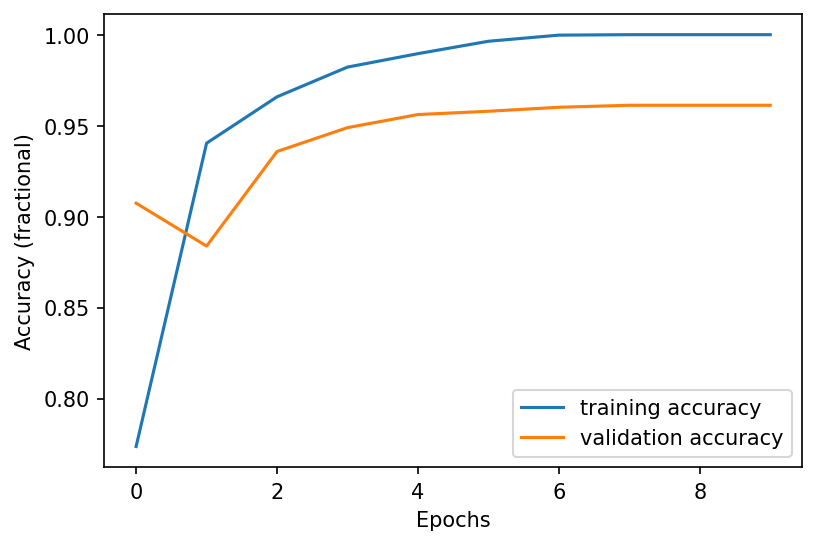

In [15]:
print(resnet_history.history.keys())
print(resnet_model.summary())
plt.plot(resnet_history.history['accuracy'])
plt.plot(resnet_history.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy (fractional)')
plt.legend(['training accuracy', 'validation accuracy'], loc='best')